# 2024-1 Artificial Intelligence (01)
## Homework #2: Implementation of a CNN with TensforFlow Keras
---
Copyright (c) Prof. Jaehyeong Sim

Department of Computer Science and Engineering

ELTEC College of Engineering

Ewha Womans University

## Guideline
### Introduction
> Here in this homework assignment 2, we will implement a CNN using TensorFlow Keras library.

### Your job
1. Please complete the code. You only have to write the parts marked as **### Please fill here**.
2. Please run your code with GPU session
3. Please answer the questions at the bottom of this notebook.

### Submission guide
1. Please rename the completed skeleton file to ***STUDENT_ID*.ipynb**. Your own student ID goes to *STUDENT_ID*. For example, if your student ID is 2412345, the file name should be **2412345.ipynb**
2. Turn in it into the Ewha CyberCampus

⚠ If you doesn't follow the submission guide above, you will get **5 point deduction** from this homework score.

### Importing necessary libraries

In [87]:
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Loading and preprocessing MNIST dataset

In [88]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
X_train /= 255
X_valid /= 255
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [89]:
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_train dtype:", X_train.dtype)
print("X_valid dtype:", X_valid.dtype)

X_train shape: (60000, 28, 28, 1)
X_valid shape: (10000, 28, 28, 1)
X_train dtype: float32
X_valid dtype: float32


### Define residual block
**Parameters:**
*   x: input
*   ch: output channel size
*   k: kernel size

**Return:**
*   final output

**The diagram of residual block:**

![[2023-1 AI] HW2.png](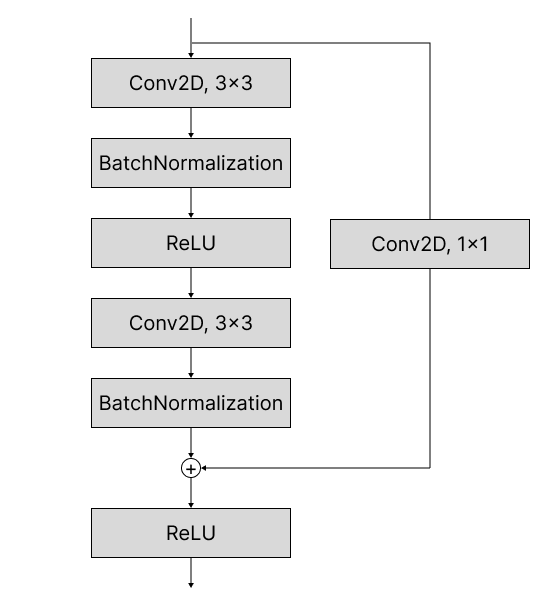)

In [90]:
def ResidualBlock(x, ch, k):
    # 처음 입력 저장용
    shortcut = x

    #첫번째 conv2d k*k 그림대로라면 k = 3
    x = layers.Conv2D(ch, kernel_size=(k,k), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    #두번째 con2d k*k
    x = layers.Conv2D(ch, kernel_size=(k,k), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # shortcut 연결에 대한 차원 맞추기
    if shortcut.shape[-1] != ch:
        shortcut = layers.Conv2D(ch, (1, 1), padding='same')(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

### Define the whole network
**The diagram of ResNet7:**

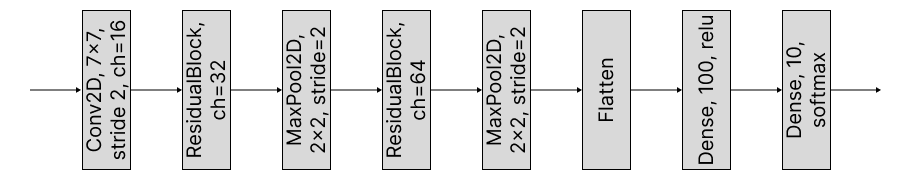

### regularization 안 거친 기본 RestNet7

In [109]:
def ResNet7():
  inputs = layers.Input(shape = (28, 28, 1))

  #첫번째
  x = layers.Conv2D(16, (7, 7), strides=2, padding='same', activation='relu')(inputs)

  #두번째
  x = ResidualBlock(x, 32, 3)

  #세번째
  x = layers.MaxPooling2D((2, 2), strides=3)(x)

  #네번째
  x = ResidualBlock(x, 64, 3)

  #다섯번째
  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  #여섯번재
  x = layers.Flatten()(x)

  #일곱번째
  x = layers.Dense(100, activation='relu')(x)

  #마지막 SOFTMAX
  x = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=x)

  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


  return model


In [110]:
model = ResNet7()

### Training loop

In [111]:
history_no_regularization  = model.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 6s 13ms/step - loss: 0.2125 - accuracy: 0.9366 - val_loss: 1.6017 - val_accuracy: 0.3080
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.1744 - val_accuracy: 0.9490
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0499 - val_accuracy: 0.9831
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0436 - val_accuracy: 0.9864
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0365 - val_accuracy: 0.9879
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0582 - val_accuracy: 0.9828
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0943 - val_accuracy: 0.9736
Epo

### Plot training curve

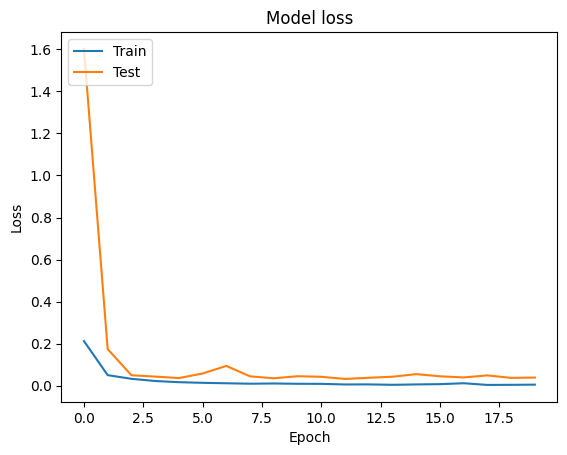

Final Validation Accuracy (No regularization): 98.93%


In [112]:
plt.plot(history_no_regularization.history['loss'])
plt.plot(history_no_regularization.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print("Final Validation Accuracy (No regularization): {:.2f}%".format(accuracy * 100))

# Question 2에 해당하는 DropOut 적용 (0.3)

In [113]:
def ResNet7_with_dropout():
  inputs = layers.Input(shape = (28, 28, 1))

  #첫번째
  x = layers.Conv2D(16, (7, 7), strides=2, padding='same', activation='relu')(inputs)

  #두번째
  x = ResidualBlock(x, 32, 3)

  #세번째
  x = layers.MaxPooling2D((2, 2), strides=3)(x)

  #네번째
  x = ResidualBlock(x, 64, 3)

  #다섯번째
  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  #여섯번재
  x = layers.Flatten()(x)

  #일곱번째
  x = layers.Dense(100, activation='relu')(x)

  #dropout 진행
  x = layers.Dropout(0.3)(x)

  #마지막 SOFTMAX
  x = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=x)

  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


  return model

In [114]:
model_with_dropout  = ResNet7_with_dropout()

In [115]:
history_with_dropout  = model_with_dropout.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 6s 11ms/step - loss: 0.3698 - accuracy: 0.8921 - val_loss: 1.6599 - val_accuracy: 0.3542
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0766 - accuracy: 0.9773 - val_loss: 0.0861 - val_accuracy: 0.9761
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0364 - val_accuracy: 0.9877
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0431 - val_accuracy: 0.9865
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0294 - accuracy: 0.9916 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0577 - val_accuracy: 0.9821
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoc

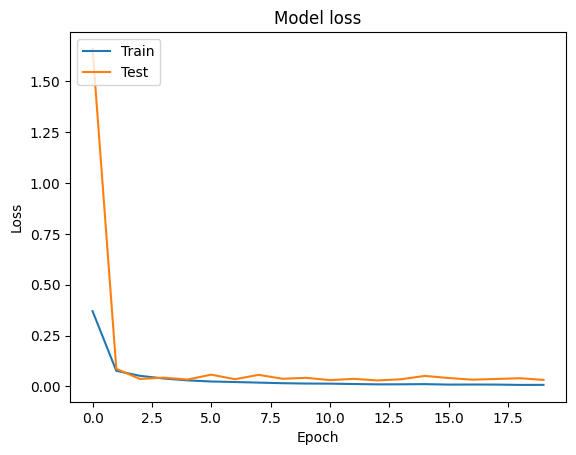

Final Validation Accuracy (With dropout): 99.12%


In [116]:
plt.plot(history_with_dropout.history['loss'])
plt.plot(history_with_dropout.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model_with_dropout.evaluate(X_valid, y_valid, verbose=0)
print("Final Validation Accuracy (With dropout): {:.2f}%".format(accuracy * 100))

Question 3에 해당하는 DropOut 적용 (0.3) + 가중치  감소 L2 (0.001)


In [126]:
from tensorflow.keras import regularizers

def ResNet7_with_dropout_and_weight_decay():
  inputs = layers.Input(shape = (28, 28, 1))

  #첫번째
  x = layers.Conv2D(16, (7, 7), strides=2, padding='same', activation='relu')(inputs)

  #두번째
  x = ResidualBlock(x, 32, 3)

  #세번째
  x = layers.MaxPooling2D((2, 2), strides=3)(x)

  #네번째
  x = ResidualBlock(x, 64, 3)

  #다섯번째
  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  #여섯번재
  x = layers.Flatten()(x)

  #일곱번째 L2 정규화, dropout 진행
  x = layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
  x = layers.Dropout(0.3)(x)

  #마지막 SOFTMAX
  x = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=x)

  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


  return model

In [127]:
model_with_dropout_and_weight_decay = ResNet7_with_dropout_and_weight_decay()


In [128]:
history_with_dropout_and_weight_decay  = model_with_dropout_and_weight_decay.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 7s 13ms/step - loss: 0.4428 - accuracy: 0.9038 - val_loss: 1.0373 - val_accuracy: 0.8012
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1650 - accuracy: 0.9789 - val_loss: 0.1544 - val_accuracy: 0.9789
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1240 - accuracy: 0.9844 - val_loss: 0.0993 - val_accuracy: 0.9887
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0933 - accuracy: 0.9892 - val_loss: 0.0794 - val_accuracy: 0.9900
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0740 - accuracy: 0.9913 - val_loss: 0.0759 - val_accuracy: 0.9891
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0581 - accuracy: 0.9931 - val_loss: 0.0705 - val_accuracy: 0.9884
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0488 - accuracy: 0.9939 - val_loss: 0.0523 - val_accuracy: 0.9906
Ep

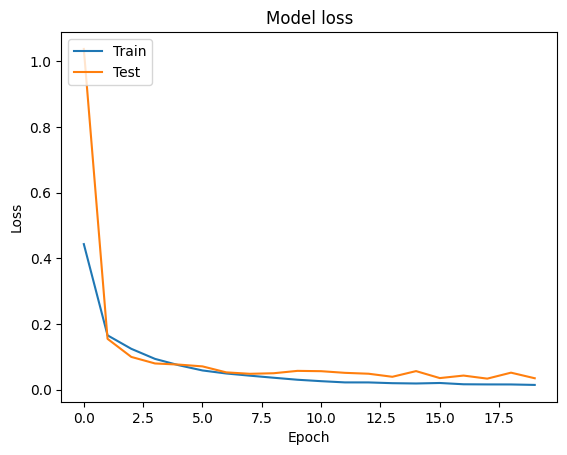

Final Validation Accuracy (With dropout and weight decay): 99.29%


In [129]:
plt.plot(history_with_dropout_and_weight_decay.history['loss'])
plt.plot(history_with_dropout_and_weight_decay.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model_with_dropout_and_weight_decay.evaluate(X_valid, y_valid, verbose=0)
print("Final Validation Accuracy (With dropout and weight decay): {:.2f}%".format(accuracy * 100))

### Question 1. Report training curve (Epoch vs. Loss) and final validation accuracy without any regularization method.

#### Answer:
<img src = "https://drive.google.com/uc?id=1EWyHxkw4CC7fngALJIhUHJMswdMqPd8I">

위와 같이 그래프가 출력된다.

accuracy는 98.94%


### Question 2. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout applied (dropout rate: 0.3). Explain how you applied dropout on your code.

#### Answer:
<img src = "https://drive.google.com/uc?id=14Tvar_lfOzeErxg0PO0Z44ZoquTqMaOG">

dropout 정규화가 적용된 모습이다.
accuracy 는 99.02로 소폭 상승했다.

드랍아웃이 적용된 코드는 하단에 첨부했다.

In [ ]:
def ResNet7_with_dropout():
  inputs = layers.Input(shape = (28, 28, 1))

  #첫번째
  x = layers.Conv2D(16, (7, 7), strides=2, padding='same', activation='relu')(inputs)

  #두번째
  x = ResidualBlock(x, 32, 3)

  #세번째
  x = layers.MaxPooling2D((2, 2), strides=3)(x)

  #네번째
  x = ResidualBlock(x, 64, 3)

  #다섯번째
  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  #여섯번재
  x = layers.Flatten()(x)

  #일곱번째
  x = layers.Dense(100, activation='relu')(x)

  #dropout 진행
  x = layers.Dropout(0.3)(x)

  #마지막 SOFTMAX
  x = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=x)

  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


  return model

softmax 적용하기 직전에
  

```python
  #dropout 진행
  x = layers.Dropout(0.3)(x)
```



해당 코드 추가

### Question 3. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout and weight decay applied (L2 regularization with 0.001). Explain how you applied weight decay on your code.

#### Answer:
<img src = "https://drive.google.com/uc?id=1xHtEkin3gUCcm-S9QiTX8RS2kKePK108">

dropout 과 L2 정규화 모두 진행된 그래프다.
accuracy는 99.23%로 dropout만 적용했을때보다 소폭 상승했다.

In [ ]:
from tensorflow.keras import regularizers

def ResNet7_with_dropout_and_weight_decay():
  inputs = layers.Input(shape = (28, 28, 1))

  #첫번째
  x = layers.Conv2D(16, (7, 7), strides=2, padding='same', activation='relu')(inputs)

  #두번째
  x = ResidualBlock(x, 32, 3)

  #세번째
  x = layers.MaxPooling2D((2, 2), strides=3)(x)

  #네번째
  x = ResidualBlock(x, 64, 3)

  #다섯번째
  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  #여섯번재
  x = layers.Flatten()(x)

  #일곱번째 L2 정규화, dropout 진행
  x = layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
  x = layers.Dropout(0.3)(x)

  #마지막 SOFTMAX
  x = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=x)

  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


  return model

위는 L2 정규화와 드롭아웃 모두 적용한 코드이다

마찬가지로 softmax 들어가기 직전에


```python
  #일곱번째 L2 정규화, dropout 진행
  x = layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
  x = layers.Dropout(0.3)(x)

```

해당 코드 추가해주었다.

